# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [75]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = mouse_metadata.merge(study_results, on="Mouse ID")


# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [76]:
# Checking the number of mice.
mouse_count = mouse_study["Mouse ID"].nunique()

print(mouse_count)

249


In [77]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_mice = mouse_study[mouse_study.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# Extract unique Mouse IDs from the duplicates
unique_duplicate_ids = duplicate_mice["Mouse ID"].unique()

# Convert to a Pandas Series
duplicate_ids_series = pd.Series(unique_duplicate_ids)

# Display the result
print(duplicate_ids_series)


0    g989
dtype: object


In [78]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice = mouse_study[mouse_study.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [79]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean = mouse_study[mouse_study["Mouse ID"] != "g989"]

mouse_study_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [80]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean = mouse_study_clean["Mouse ID"].nunique()

print(mouse_count_clean)

248


## Summary Statistics

In [81]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_summary = mouse_study_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"]

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
tumor_summary_stats = pd.DataFrame({
    'Mean Tumor Volume': tumor_summary.mean(),
    'Median Tumor Volume': tumor_summary.median(),
    'Tumor Volume Variance': tumor_summary.var(),
    'Tumor Volume Standard Deviation': tumor_summary.std(),
    'Tumor Volume Std. Err. (SEM)': tumor_summary.std() / tumor_summary.count()**0.5  # Standard Error of the Mean
})

tumor_summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Std. Err. (SEM)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [82]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

tumor_summary_stats_agg = mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Standard_Deviation='std',
    SEM=lambda x: x.std() / (x.count()**0.5) 
)

tumor_summary_stats_agg

,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

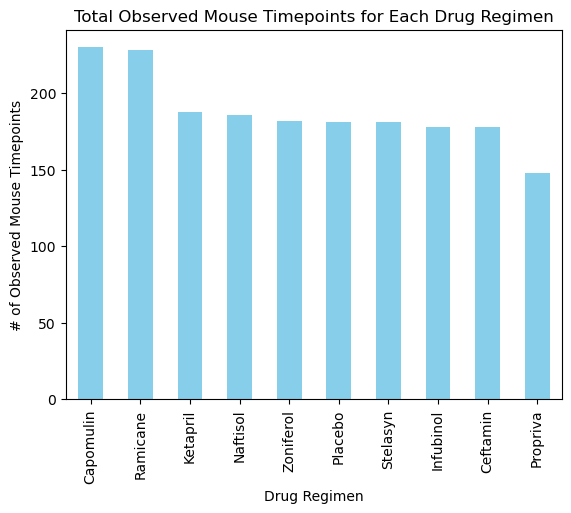

In [83]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = mouse_study_clean["Drug Regimen"].value_counts()

regimen_counts.plot(kind="bar", color="skyblue")
plt.title("Total Observed Mouse Timepoints for Each Drug Regimen")
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()


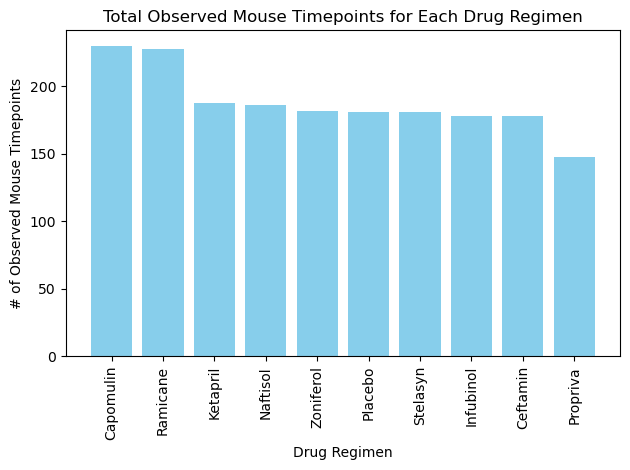

In [84]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.bar(regimen_counts.index, regimen_counts.values, color='skyblue', align="center")
plt.title("Total Observed Mouse Timepoints for Each Drug Regimen")
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

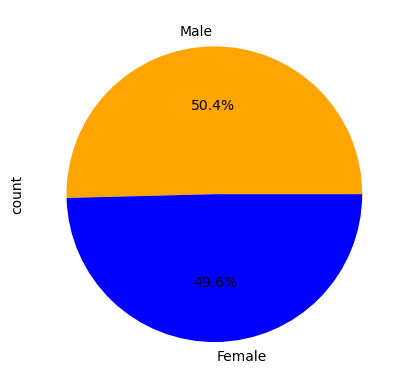

In [85]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_by_sex = mouse_study_clean[["Mouse ID", "Sex"]].drop_duplicates()


# Make the pie chart
mouse_by_sex_count = unique_mice_by_sex["Sex"].value_counts()

mouse_by_sex_count.plot(kind="pie", autopct='%1.1f%%', colors=("orange", "blue"))


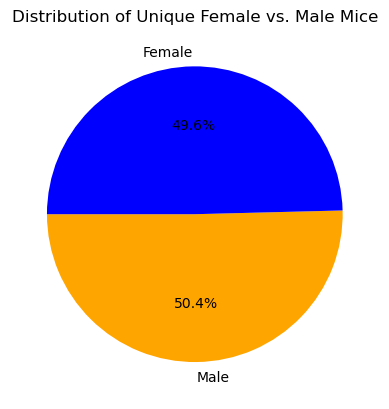

In [86]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender

# Make the pie chart
plt.pie(mouse_by_sex_count,
        labels = mouse_by_sex_count.index,
        autopct='%1.1f%%',
        colors=["orange", "blue"],
        startangle=180)
plt.title("Distribution of Unique Female vs. Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [87]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = mouse_study_clean.groupby("Mouse ID")["Timepoint"].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoints, mouse_study_clean, on=["Mouse ID", "Timepoint"])

merged_data.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [88]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []


# Calculate the IQR and quantitatively determine if there are any potential outliers.

for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_data = merged_data[merged_data["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]

    # add subset
    tumor_volumes.append(tumor_data)


    # Calculate Q1, Q3, and IQR
    Q1 = tumor_data.quantile(0.25)
    Q3 = tumor_data.quantile(0.75)
    IQR = Q3 - Q1
    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identify outliers
    outliers = tumor_data[(tumor_data < lower_bound) | (tumor_data > upper_bound)]
    
    # Print out the outliers for the current treatment
    print(f"{treatment}'s potential outliers: {outliers}")



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


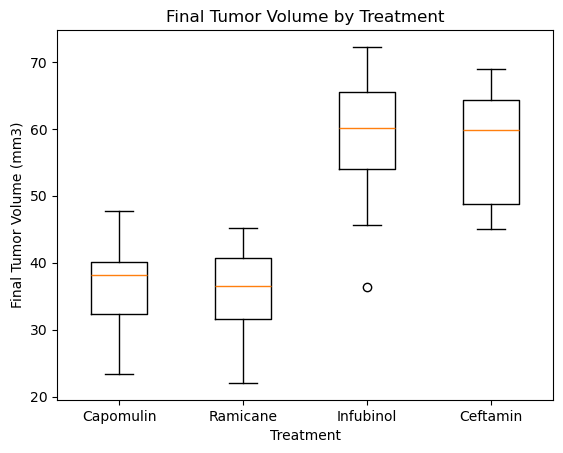

In [89]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

plt.boxplot(tumor_volumes, labels=treatments)
plt.title('Final Tumor Volume by Treatment')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Treatment')
plt.show()

## Line and Scatter Plots

In [67]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#Filter for the single mouse with Mouse ID I509
mouse_id = "b128"
capomulin_data_by_mouse = mouse_study_clean[(mouse_study_clean["Drug Regimen"] == "Capomulin") & (mouse_study_clean["Mouse ID"] == mouse_id)]

# Check the dataframe capomulin_data
capomulin_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0


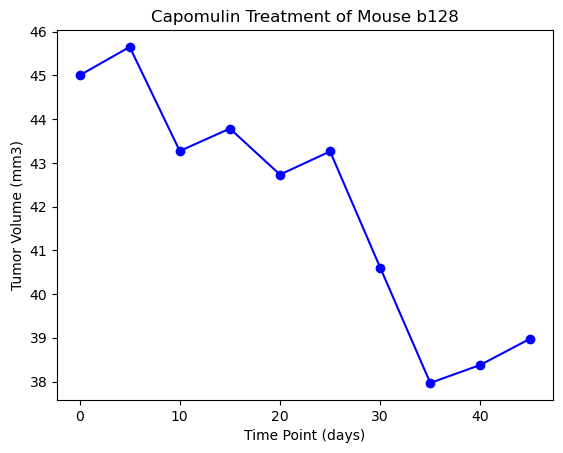

In [92]:
# Create the line plot
plt.plot(capomulin_data_by_mouse['Timepoint'], capomulin_data_by_mouse['Tumor Volume (mm3)'], marker='o', color='blue')
plt.title(f'Capomulin Treatment of Mouse {mouse_id}')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


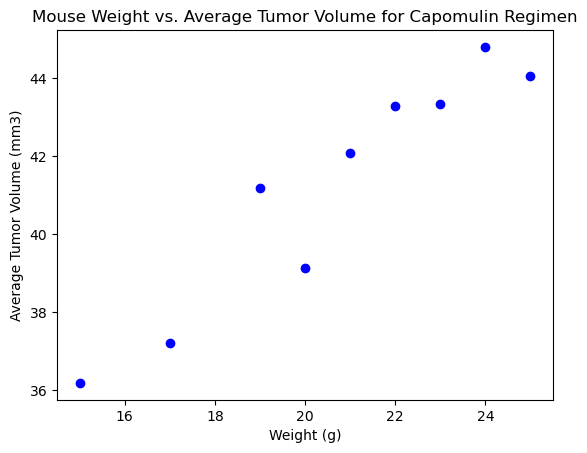

In [93]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Process the data to find average tumor volume by weight
capomulin_data_all = mouse_study_clean[mouse_study_clean["Drug Regimen"] == "Capomulin"]
average_tumor_volume = capomulin_data_all.groupby("Weight (g)")["Tumor Volume (mm3)"].mean().reset_index()

# Create the scatter plot

plt.scatter(average_tumor_volume["Weight (g)"], average_tumor_volume["Tumor Volume (mm3)"], color='blue', marker='o')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.9505243961855268


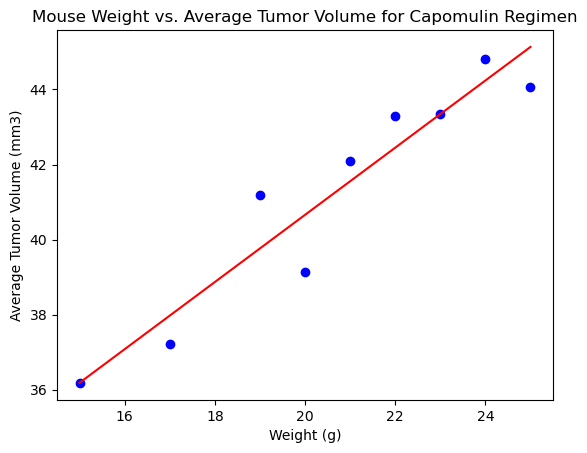

In [97]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the linear regression line
x_values = average_tumor_volume["Weight (g)"]
y_values = average_tumor_volume["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print the correlation coefficient
print(f"The correlation between mouse weight and the average tumor volume is {rvalue}")

# Create the scatter plot with the linear regression line
plt.scatter(x_values, y_values, color='blue', marker='o')
plt.plot(x_values,regress_values,"r-")
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
